## Importing Libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


In [4]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [5]:
# pip install scikit-learn

In [6]:
# !pip install hypopt

In [7]:
# !pip install pandas 

In [8]:
# !pip install matplotlib

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
 
# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
 
# Importing hypopt library for grid search
from hypopt import GridSearch
 
# Importing Keras libraries
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, GlobalAveragePooling2D
 
import warnings
warnings.filterwarnings('ignore')

In [11]:
##Mounting Drive (only for colab. Not required on local machine)
# from google.colab import drive



# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/"


# Setting Paths for Train,Validation and Test Datasets

In [12]:
root_dir = 'E:/Github/flower-classification/Classification-using-Transfer-Learning/data'

PATH = os.path.join(root_dir, 'SplitDataset')

In [13]:
train_dir = os.path.join(PATH,'train')
validation_dir = os.path.join(PATH,'val')
test_dir = os.path.join(PATH,'test')

#Creating Category Labels

train_labels = []
validation_labels = []
test_labels = []

# Creating Label Data

In [14]:
for idx_cat,i in enumerate(os.listdir(train_dir)):
    train_files = train_dir+'/'+i
    for train_idx,j in enumerate(os.listdir(train_files)):
            train_labels.append(idx_cat)

In [15]:
for idx_cat,i in enumerate(os.listdir(validation_dir)):
    val_files = validation_dir+'/'+i
    for val_idx,j in enumerate(os.listdir(val_files)):
        validation_labels.append(idx_cat)

In [16]:
for idx_cat,i in enumerate(os.listdir(test_dir)):
    test_files = test_dir+'/'+i
    for train_idx,j in enumerate(os.listdir(test_files)):
        test_labels.append(idx_cat)

In [17]:
# list(set(New_train_labels))
img_width, img_height = 224, 224

## Display some pictures

In [13]:
# Show pictures
import os, random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
# from PIL import Image

def show_pictures(path):
    random_img = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_img)

    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(img_tensor)
    plt.show()

In [14]:
# pip install Pillow


In [15]:
# import sys
# from PIL import Image
# sys.modules['Image'] = Image 

In [16]:
# import Image
# print(Image.__file__)

In [17]:
# from PIL import Image
# # print(Image.__file__)

daisy


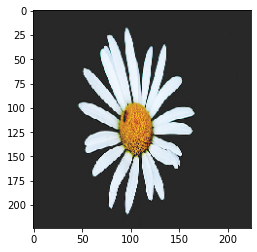

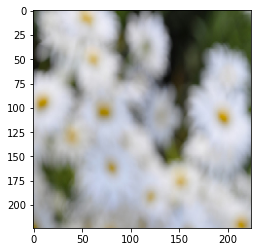

dandelion


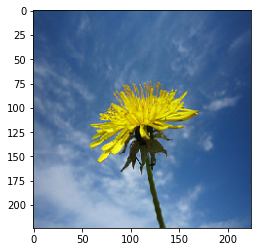

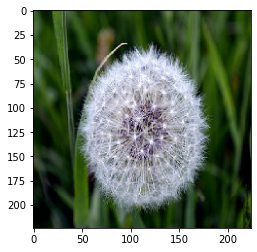

rose


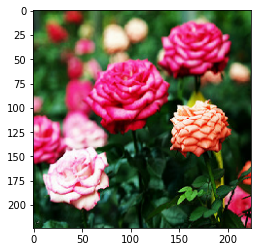

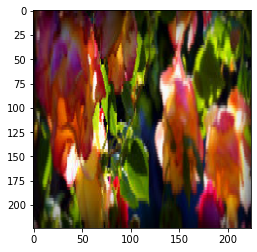

sunflower


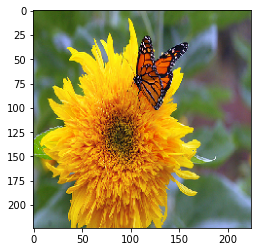

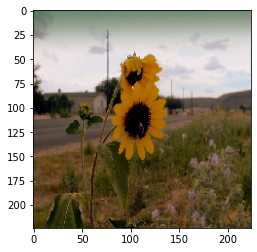

tulip


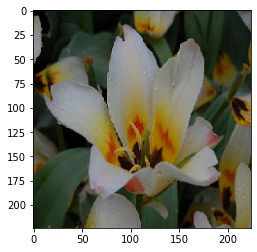

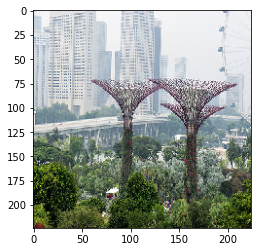

In [18]:
for i in (os.listdir(train_dir)):
  train_files = train_dir+'/'+i
  print(i)
  for i in range(0,2):
       show_pictures(train_files)

# ResNet50 models after removing different layers

# 1 ) without removing any layer

In [18]:
#Defining the Model ResNet50
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

image_input = Input(shape=(224, 224, 3))
ResNet50_model1 = ResNet50(input_tensor=image_input, include_top=True,weights='imagenet')
ResNet50_model1.summary()
for layer in ResNet50_model1.layers:
  layer.trainable = False

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

# 2) Model after popping last dense layer

In [19]:
ResNet50_model1.layers.pop() 
ResNet50_model2 = Model(ResNet50_model1.input, ResNet50_model1.layers[-2].output)
ResNet50_model2.summary()

for layer in ResNet50_model2.layers:
  layer.trainable = False

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

# 3) Model popping Global Average Pooling2 Layer

In [20]:
ResNet50_model2.layers.pop() 
ResNet50_model3 = Model(ResNet50_model2.input, ResNet50_model2.layers[-2].output)
ResNet50_model3.summary()


for layer in ResNet50_model3.layers:
  layer.trainable = False

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

# Feature Extraction Code

In [24]:
#Extracting the feature Extraction

import tensorflow.keras as keras

from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image

def images_to_array(dataset_dir,model):
 
        dataset_array = []
        
        classes_names = os.listdir(dataset_dir)

        for current_class_name in classes_names:
            class_dir = os.path.join(dataset_dir, current_class_name)
            images_in_class = os.listdir(class_dir)
            #print("Class index", class_counter, ", ", current_class_name, ":" , len(images_in_class))

            for image_file in images_in_class:
                     if image_file.endswith(".jpg"):
                        image_file_dir = os.path.join(class_dir, image_file)
                        img = keras.preprocessing.image.load_img(image_file_dir, target_size=(224, 224))
                        img_array = keras.preprocessing.image.img_to_array(img)
                        img_data = np.expand_dims(img_array, axis=0)
                        img_data = preprocess_input(img_data)
                        ResNet50_feature = model.predict(img_data)
                        ResNet50_feature_np = ResNet50_feature.flatten()
                        dataset_array.append(ResNet50_feature_np)
                        dataset_array_model = np.array(dataset_array)
                        dataset_array_model.shape

        return dataset_array_model

# Extracting Features for ResNet50 models 

In [25]:
#Without popping any layer for ResNet50
train_dataset_array1_ResNet50 = images_to_array(dataset_dir=train_dir,model = ResNet50_model1)
val_dataset_array1_ResNet50 = images_to_array(dataset_dir=validation_dir,model = ResNet50_model1)
test_dataset_array1_ResNet50 = images_to_array(dataset_dir=test_dir,model = ResNet50_model1)
print("Training Data Array Shape :", len(train_dataset_array1_ResNet50))
print("Validation Data Array Shape :", len(val_dataset_array1_ResNet50))
print("Test Data Array Shape :", len(test_dataset_array1_ResNet50))

Training Data Array Shape : 2662
Validation Data Array Shape : 921
Test Data Array Shape : 896


In [26]:
#With popping first layer
train_dataset_array2_ResNet50 = images_to_array(dataset_dir=train_dir,model = ResNet50_model2)
val_dataset_array2_ResNet50 = images_to_array(dataset_dir=validation_dir,model = ResNet50_model2)
test_dataset_array2_ResNet50 = images_to_array(dataset_dir=test_dir,model = ResNet50_model2)
print("Training Data Array Shape :", len(train_dataset_array2_ResNet50))
print("Validation Data Array Shape :", len(val_dataset_array2_ResNet50))
print("Test Data Array Shape :", len(test_dataset_array2_ResNet50))

Training Data Array Shape : 2662
Validation Data Array Shape : 921
Test Data Array Shape : 896


In [27]:
#With popping Second layer
train_dataset_array3_ResNet50 = images_to_array(dataset_dir=train_dir,model = ResNet50_model3)
val_dataset_array3_ResNet50 = images_to_array(dataset_dir=validation_dir,model = ResNet50_model3)
test_dataset_array3_ResNet50 = images_to_array(dataset_dir=test_dir,model = ResNet50_model3)
print("Training Data Array Shape :", len(train_dataset_array3_ResNet50))
print("Validation Data Array Shape :", len(val_dataset_array3_ResNet50))
print("Test Data Array Shape :", len(test_dataset_array3_ResNet50))


Training Data Array Shape : 2662
Validation Data Array Shape : 921
Test Data Array Shape : 896


# Saving extracted features of ResNet50

In [21]:
saving_path = os.path.join(root_dir, 'SavedFeatures/ResNet50')

In [29]:
import numpy as np
np.save(os.path.join(saving_path,'train-features-0layer'), train_dataset_array1_ResNet50)
np.save(os.path.join(saving_path,'train-labels-0layer'), train_labels)

np.save(os.path.join(saving_path,'val-features-0layer'), val_dataset_array1_ResNet50)
np.save(os.path.join(saving_path,'val-labels-0layer'), validation_labels)

np.save(os.path.join(saving_path,'test-features-0layer'), test_dataset_array1_ResNet50)
np.save(os.path.join(saving_path,'test-labels-0layer'), test_labels)

In [30]:
import numpy as np
np.save(os.path.join(saving_path,'train-features-1layer'), train_dataset_array2_ResNet50)
np.save(os.path.join(saving_path,'val-features-1layer'), val_dataset_array2_ResNet50)
np.save(os.path.join(saving_path,'test-features-1layer'), test_dataset_array2_ResNet50)

In [31]:
import numpy as np
np.save(os.path.join(saving_path,'train-features-2layer'), train_dataset_array3_ResNet50)
np.save(os.path.join(saving_path,'val-features-2layer'), val_dataset_array3_ResNet50)
np.save(os.path.join(saving_path,'test-features-2layer'), test_dataset_array3_ResNet50)

## Use the saved extracted features of ResNet50

In [22]:
#Access the Features
import numpy as np
#np.load("/content/gdrive/My Drive/ResNet50_Features/No_Layer_Removed/train-features-ResNet50-0layer.npy")
train_dataset_array1_ResNet50 = np.load(os.path.join(saving_path,'train-features-0layer.npy'))
train_labels = np.load(os.path.join(saving_path,'train-labels-0layer.npy'))

val_dataset_array1_ResNet50 = np.load(os.path.join(saving_path,'val-features-0layer.npy'))
validation_labels = np.load(os.path.join(saving_path,'val-labels-0layer.npy'))

test_dataset_array1_ResNet50 = np.load(os.path.join(saving_path,'test-features-0layer.npy'))
test_labels = np.load(os.path.join(saving_path,'test-labels-0layer.npy'))


In [23]:
train_dataset_array2_ResNet50 = np.load(os.path.join(saving_path,'train-features-1layer.npy'))
val_dataset_array2_ResNet50 = np.load(os.path.join(saving_path,'val-features-1layer.npy'))
test_dataset_array2_ResNet50 = np.load(os.path.join(saving_path,'test-features-2layer.npy'))

In [24]:
train_dataset_array3_ResNet50 = np.load(os.path.join(saving_path,'train-features-2layer.npy'))
val_dataset_array3_ResNet50 = np.load(os.path.join(saving_path,'val-features-2layer.npy'))
test_dataset_array3_ResNet50 = np.load(os.path.join(saving_path,'test-features-2layer.npy'))

## Creating Final Extracted Features and Target Labels

In [25]:
#Clubbing Features
train_dataset_array1_ResNet50 = np.concatenate((train_dataset_array1_ResNet50, val_dataset_array1_ResNet50))
train_dataset_array2_ResNet50= np.concatenate((train_dataset_array2_ResNet50, val_dataset_array2_ResNet50))
train_dataset_array3_ResNet50 = np.concatenate((train_dataset_array3_ResNet50, val_dataset_array3_ResNet50))
train_labels = np.concatenate((train_labels, validation_labels))
# train_dataset_array1_ResNet50.shape

# PCA


In [26]:

#############################################################################################
#           To be used only when the extracted features are too big 
#           PCA cn be used to reduce the the dimension of features

#############################################################################################


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.

train_dataset_array1_ResNet50 = scaler.fit_transform(train_dataset_array1_ResNet50)
train_dataset_array2_ResNet50 = scaler.fit_transform(train_dataset_array2_ResNet50)
train_dataset_array3_ResNet50 = scaler.fit_transform(train_dataset_array3_ResNet50)


# # # Apply transform to both the training set and the test set.


# train_dataset_array1_ResNet50 = scaler.transform(train_dataset_array1_ResNet50)
test_dataset_array1_ResNet50 = scaler.fit_transform(test_dataset_array1_ResNet50)

# train_dataset_array2_ResNet50 = scaler.transform(train_dataset_array2_ResNet50)
test_dataset_array2_ResNet50 = scaler.fit_transform(test_dataset_array2_ResNet50)

# train_dataset_array3_ResNet50 = scaler.transform(train_dataset_array3_ResNet50)
test_dataset_array3_ResNet50 = scaler.fit_transform(test_dataset_array3_ResNet50)


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


train_dataset_array1_ResNet50 = pca.fit_transform(train_dataset_array1_ResNet50)
train_dataset_array2_ResNet50 = pca.fit_transform(train_dataset_array2_ResNet50)
train_dataset_array3_ResNet50 = pca.fit_transform(train_dataset_array2_ResNet50)


# Apply transform to both the training set and the test set.



# train_dataset_array1_ResNet50 = pca.transform(train_dataset_array1_ResNet50)
test_dataset_array1_ResNet50 = pca.fit_transform(test_dataset_array1_ResNet50)

# train_dataset_array2_ResNet50 = pca.transform(train_dataset_array2_ResNet50)
test_dataset_array2_ResNet50 = pca.fit_transform(test_dataset_array2_ResNet50)

# train_dataset_array3_ResNet50 = pca.transform(train_dataset_array3_ResNet50)
test_dataset_array3_ResNet50 = pca.fit_transform(test_dataset_array3_ResNet50)


## Applying SVM Classifier on extracted models Features

In [49]:
#Implementing Classifier SVM
import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
# import sklearn.external as extjoblib
import joblib
from sklearn import svm, metrics, datasets

In [50]:
#Without removing any layer
def SVM_Classifier(train_dataset_array,New_train_labels,test_dataset_array):
      param_grid = [
        {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
        {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
      ]
      svc = svm.SVC()
      clf = GridSearchCV(svc, param_grid, refit = True, verbose = 3, n_jobs=-1)
      clf.fit(train_dataset_array,New_train_labels)
      y_predict_svm = clf.predict(test_dataset_array)
      return y_predict_svm

In [37]:
# train_dataset_array1_ResNet50.shape

In [38]:
# np.shape(train_labels)

In [ ]:
y_predict_svm1_ResNet50 = SVM_Classifier(train_dataset_array1_ResNet50,train_labels,test_dataset_array1_ResNet50)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 23.9min


In [ ]:
y_predict_svm2_ResNet50 = SVM_Classifier(train_dataset_array2_ResNet50,train_labels,test_dataset_array2_ResNet50)

In [ ]:
np.save('data/Classifier_results/y_predict_svm2_ResNet50.npy',y_predict_svm2_ResNet50)

In [ ]:
y_predict_svm3_ResNet50 = SVM_Classifier(train_dataset_array3_ResNet50,train_labels,test_dataset_array3_ResNet50)

In [ ]:
np.save('data/Classifier_results/y_predict_svm3_ResNet50.npy',y_predict_svm3_ResNet50)

In [ ]:
y_predict_svm1_ResNet50 = np.load('data/Classifier_results/y_predict_svm1_ResNet50.npy')
y_predict_svm2_ResNet50 = np.load('data/Classifier_results/y_predict_svm2_ResNet50.npy')
y_predict_svm3_ResNet50 = np.load('data/Classifier_results/y_predict_svm3_ResNet50.npy')

## Applying Random Forest Classifier on extracted model Features

In [28]:
def RF_Classifier(train_dataset_array,train_labels,test_dataset_array):
    #Import Random Forest Model
    from sklearn.ensemble import RandomForestClassifier

    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100, n_jobs=-1)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(train_dataset_array, train_labels)

    y_predict = clf.predict(test_dataset_array)
    return y_predict

In [29]:
y_predict_rf1_ResNet50 = RF_Classifier(train_dataset_array1_ResNet50,train_labels,test_dataset_array1_ResNet50)

In [30]:
np.save("data/Classifier_results/y_predict_rf1_ResNet50.npy",y_predict_rf1_ResNet50)

In [31]:
y_predict_rf2_ResNet50 = RF_Classifier(train_dataset_array2_ResNet50,train_labels,test_dataset_array2_ResNet50)

In [32]:
np.save("data/Classifier_results/y_predict_rf2_ResNet50.npy",y_predict_rf2_ResNet50)

In [33]:
y_predict_rf3_ResNet50 = RF_Classifier(train_dataset_array3_ResNet50,train_labels,test_dataset_array3_ResNet50)

In [34]:
np.save("data/Classifier_results/y_predict_rf3_ResNet50.npy",y_predict_rf3_ResNet50)

In [ ]:
y_predict_rf1_ResNet50 = np.load('data/Classifier_results/y_predict_rf1_ResNet50.npy')
y_predict_rf2_ResNet50 = np.load('data/Classifier_results/y_predict_rf2_ResNet50.npy')
y_predict_rf3_ResNet50 = np.load('data/Classifier_results/y_predict_rf3_ResNet50.npy')

## Applying XGBoost Classifier on extracted model Features

In [ ]:
# pip install xgboost

In [ ]:
def XGBoost_Classifier(train_dataset_array, New_train_labels,test_dataset_array):
  #XGBoost
  from numpy import loadtxt
  from xgboost import XGBClassifier

  # fit model no training data
  model = XGBClassifier( learning_rate =0.1,
              n_estimators=1000,
              max_depth=5,
              min_child_weight=1,
              gamma=0,
              subsample=0.8,
              colsample_bytree=0.8,
              objective= 'binary:logistic',
              nthread=4,
              scale_pos_weight=1,
              seed=27,
              n_jobs=-1)
 
  #model=XGBClassifier()
  model.fit(train_dataset_array, New_train_labels)
  y_predict = model.predict(test_dataset_array)
  return y_predict

In [ ]:
y_predict_xg1_ResNet50 = XGBoost_Classifier(train_dataset_array1_ResNet50, train_labels,test_dataset_array1_ResNet50)

In [ ]:
np.save("data/Classifier_results/y_predict_xg1_ResNet50.npy",y_predict_xg1_ResNet50)

In [ ]:
y_predict_xg2_ResNet50 = XGBoost_Classifier(train_dataset_array2_ResNet50, train_labels,test_dataset_array2_ResNet50)

In [ ]:
np.save("data/Classifier_results/y_predict_xg2_ResNet50.npy",y_predict_xg2_ResNet50)

In [ ]:
y_predict_xg3_ResNet50 = XGBoost_Classifier(train_dataset_array3_ResNet50, train_labels,test_dataset_array3_ResNet50)

In [ ]:
np.save("data/Classifier_results/y_predict_xg3_ResNet50.npy",y_predict_xg3_ResNet50)

In [ ]:
y_predict_xg1_ResNet50 = np.load('data/Classifier_results/y_predict_xg1_ResNet50.npy')
y_predict_xg2_ResNet50 = np.load('data/Classifier_results/y_predict_xg2_ResNet50.npy')
y_predict_xg3_ResNet50 = np.load('data/Classifier_results/y_predict_xg3_ResNet50.npy')

## Applying Naive Bayes Classifier on extracted model Features

In [35]:
def NB_Classifier(train_dataset_array,train_labels,test_dataset_array):
  #Import Gaussian Naive Bayes model
  from sklearn.naive_bayes import GaussianNB

  #Create a Gaussian Classifier
  model = GaussianNB()

  # Train the model using the training sets
  model.fit(train_dataset_array,train_labels)
  y_predict = model.predict(test_dataset_array)
  return y_predict

In [36]:
y_predict_NB1_ResNet50 = NB_Classifier(train_dataset_array1_ResNet50,train_labels,test_dataset_array1_ResNet50)

In [37]:
np.save("data/Classifier_results/y_predict_NB1_ResNet50.npy",y_predict_NB1_ResNet50)

In [38]:
y_predict_NB2_ResNet50 = NB_Classifier(train_dataset_array2_ResNet50,train_labels,test_dataset_array2_ResNet50)

In [39]:
np.save("data/Classifier_results/y_predict_NB2_ResNet50.npy",y_predict_NB2_ResNet50)

In [40]:
y_predict_NB3_ResNet50 = NB_Classifier(train_dataset_array3_ResNet50,train_labels,test_dataset_array3_ResNet50)

In [41]:
np.save("data/Classifier_results/y_predict_NB3_ResNet50.npy",y_predict_NB3_ResNet50)

In [ ]:
y_predict_NB1_ResNet50 = np.load('data/Classifier_results/y_predict_NB1_ResNet50.npy')
y_predict_NB2_ResNet50 = np.load('data/Classifier_results/y_predict_NB2_ResNet50.npy')
y_predict_NB3_ResNet50 = np.load('data/Classifier_results/y_predict_NB3_ResNet50.npy')

## Applying Bayesian Ridge Classifier on extracted model Features

In [42]:
def Ridge_Classifier(train_dataset_array, New_train_labels,test_dataset_array):
  from sklearn import linear_model
  from sklearn.linear_model import RidgeClassifier
  clf = RidgeClassifier().fit(train_dataset_array, New_train_labels)
  y_pred_br = clf.predict(test_dataset_array)
  return y_pred_br

In [43]:
y_predict_Ridge1_ResNet50 = Ridge_Classifier(train_dataset_array1_ResNet50, train_labels,test_dataset_array1_ResNet50)

In [44]:
np.save("data/Classifier_results/y_predict_Ridge1_ResNet50.npy",y_predict_Ridge1_ResNet50)

In [45]:
y_predict_Ridge2_ResNet50 = Ridge_Classifier(train_dataset_array2_ResNet50, train_labels,test_dataset_array2_ResNet50)

In [46]:
np.save("data/Classifier_results/y_predict_Ridge2_ResNet50.npy",y_predict_Ridge2_ResNet50)

In [47]:
y_predict_Ridge3_ResNet50 = Ridge_Classifier(train_dataset_array3_ResNet50, train_labels,test_dataset_array3_ResNet50)

In [48]:
np.save("data/Classifier_results/y_predict_Ridge3_ResNet50.npy",y_predict_Ridge3_ResNet50)

In [ ]:
y_predict_Ridge1_ResNet50 = np.load('data/Classifier_results/y_predict_Ridge1_ResNet50.npy')
y_predict_Ridge2_ResNet50 = np.load('data/Classifier_results/y_predict_Ridge2_ResNet50.npy')
y_predict_Ridge3_ResNet50 = np.load('data/Classifier_results/y_predict_Ridge3_ResNet50.npy')

In [ ]:
# pip install PrettyTable

## Displaying Tabular Results for Accuracy

In [ ]:
from prettytable import PrettyTable
print("\nResNet50(Accuracy):")
t = PrettyTable(['Removed Layer','SVM', 'Random Forest','XGBoost','Naive Bayes','Bayesian Ridge Regression'])
t.add_row([0, "{:.2%}".format(accuracy_score(test_labels,y_predict_svm1_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_rf1_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_xg1_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_NB1_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_Ridge1_ResNet50))])
t.add_row([1, "{:.2%}".format(accuracy_score(test_labels,y_predict_svm2_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_rf2_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_xg2_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_NB2_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_Ridge2_ResNet50))])
t.add_row([2, "{:.2%}".format(accuracy_score(test_labels,y_predict_svm3_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_rf3_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_xg3_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_NB3_ResNet50)),"{:.2%}".format(accuracy_score(test_labels,y_predict_Ridge3_ResNet50))])
print(t)

## Displaying Tabular Results for Precision

In [ ]:
from sklearn.metrics import precision_score
print("\nResNet50(Precision):")
t = PrettyTable(['Removed Layer','SVM', 'Random Forest','XGBoost','Naive Bayes','Bayesian Ridge Regression'])
t.add_row([0, "{:.2%}".format(precision_score(test_labels,y_predict_svm1_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_rf1_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_xg1_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_NB1_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_Ridge1_ResNet50, average='macro'))])
t.add_row([1, "{:.2%}".format(precision_score(test_labels,y_predict_svm2_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_rf2_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_xg2_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_NB2_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_Ridge2_ResNet50, average='macro'))])
t.add_row([2, "{:.2%}".format(precision_score(test_labels,y_predict_svm3_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_rf3_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_xg3_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_NB3_ResNet50, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_Ridge3_ResNet50, average='macro'))])
print(t)

## Displaying Tabular Results for Recall

In [ ]:
from sklearn.metrics import recall_score
print("\nResNet50(Recall):")
t = PrettyTable(['Removed Layer','SVM', 'Random Forest','XGBoost','Naive Bayes','Bayesian Ridge Regression'])
t.add_row([0, "{:.2%}".format(recall_score(test_labels, y_predict_svm1_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_rf1_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_xg1_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_NB1_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_Ridge1_ResNet50, average='macro'))])
t.add_row([1, "{:.2%}".format(recall_score(test_labels, y_predict_svm2_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_rf2_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_xg2_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_NB2_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_Ridge2_ResNet50, average='macro'))])
t.add_row([2, "{:.2%}".format(recall_score(test_labels, y_predict_svm3_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_rf3_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_xg3_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_NB3_ResNet50, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_Ridge3_ResNet50, average='macro'))])
print(t)

## Displaying Tabular Results for F1 Score

In [ ]:
from sklearn.metrics import f1_score
print("\nResNet50(F1 Score):")
t = PrettyTable(['Removed Layer','SVM', 'Random Forest','XGBoost','Naive Bayes','Bayesian Ridge Regression'])
t.add_row([0, "{:.2%}".format(f1_score(test_labels, y_predict_svm1_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_rf1_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_xg1_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_NB1_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_Ridge1_ResNet50, average='macro'))])
t.add_row([1, "{:.2%}".format(f1_score(test_labels, y_predict_svm2_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_rf2_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_xg2_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_NB2_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_Ridge2_ResNet50, average='macro'))])
t.add_row([2, "{:.2%}".format(f1_score(test_labels, y_predict_svm3_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_rf3_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_xg3_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_NB3_ResNet50, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_Ridge3_ResNet50, average='macro'))])
print(t)